In [19]:
from bin_packing_solver import *
import numpy as np
import random
# random.seed(42)

# sequence = (1,2,3,4,5,6,7,8,9,10)
sequence = np.arange(1, 8)

bin_capacity = 10
item_list = random.choices(sequence, k=20)


In [7]:
from utils import *

In [3]:
test_solver("first_fit", bin_capacity, item_list)

Full bins: 166, Not full bins: 383
Elapsed time: 0.0361 seconds


In [4]:
test_solver("first_fit_decreasing", bin_capacity, item_list)

Full bins: 408, Not full bins: 123
Elapsed time: 0.0359 seconds


python src/cli.py first_fit 100 --file data/big_items.json --count 

python src/cli.py first_fit_decreasing 100 --file data/big_items.json --count 

python src/cli.py full_bin_packing 100 --file data/big_items.json --count 

In [5]:
test_solver("full_bin_packing", bin_capacity, item_list)

Full bins: 408, Not full bins: 123
Elapsed time: 0.0547 seconds


In [ ]:
import json
def load_data_from_file(filepath: str) -> List[int]:
    with open(filepath, "r") as f:
        data = json.load(f)
    return data["items"]


In [12]:
test_solver("full_bin_packing", bin_capacity, load_data_from_file("C:/Users/gabry/Desktop/School_projects/MHE/bin_packing_project/data/big_items.json"))


Full bins: 4739, Not full bins: 434
Elapsed time: 3.1060 seconds


| **Algorytm**           | **Co robi?**                                                                 |
|------------------------|------------------------------------------------------------------------------|
| **First Fit**          | Wkłada przedmiot do pierwszego pasującego bina                               |
| **First Fit Decreasing** | Sortuje malejąco, potem używa `first_fit`                                   |
| **Best Fit**           | Wkłada przedmiot do najlepiej dopasowanego bina (najmniej wolnego miejsca, które go jeszcze pomieści) |
| **Full Bin Packing**   | Stara się maksymalnie zapełniać biny po kolei, tworząc jeden pełny bin naraz |


In [14]:
def plot_bins(bins, title):
    import matplotlib.pyplot as plt
    import random

    fig, ax = plt.subplots(figsize=(10, 6))
    y_offset = 0
    colors = list(plt.cm.tab20.colors)  # Convert to a list to allow shuffling
    random.shuffle(colors)  # Shuffle the colors

    for bin in bins:
        start = 0
        for i, item in enumerate(bin.item_list):
            ax.broken_barh([(start, item)], (y_offset, 0.5),
                           facecolors=colors[i % len(colors)],
                           edgecolor='black')
            start += item
        y_offset += 1

    ax.set_title(title)
    ax.set_xlabel("Bin Capacity")
    ax.set_ylabel("Bins")
    plt.show()

In [22]:
from typing import List, Tuple

def test_solver2(method: str, 
                bin_capacity: int, 
                item_list: List,
                display_bins_mode: bool = False,
                count_bins_mode: bool = True,
                visualize: bool = False) -> list[Bin]:
    timer.start()
    bins = solve_bin_packing(method, bin_capacity, item_list)

    if display_bins_mode:
        display_bins(bins)
    if count_bins_mode:
        full_bins, not_full_bins = count_bins(bins)
        print(f"Full bins: {full_bins}, Not full bins: {not_full_bins}")
    if visualize:
        plot_bins(bins, title=f"Method: {method}, Capacity: {bin_capacity}")

    timer.stop()

Full bins: 7, Not full bins: 1


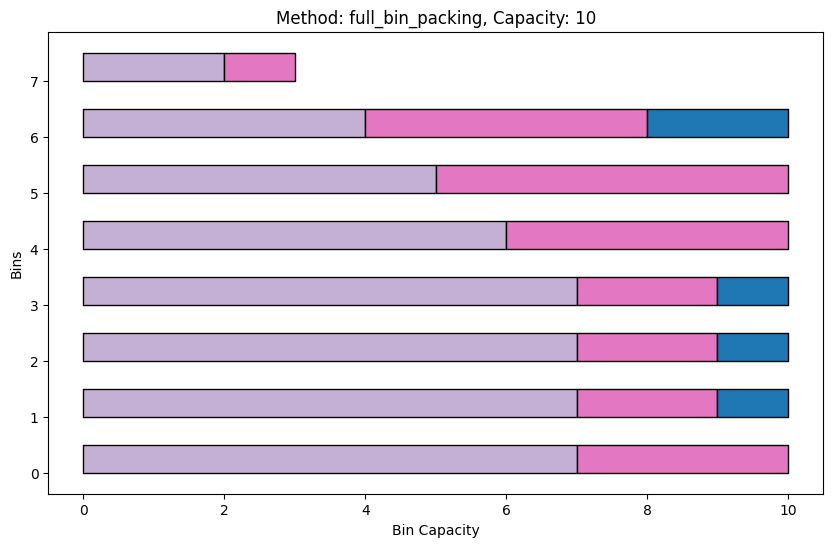

Elapsed time: 0.1691 seconds


In [20]:
test_solver2("full_bin_packing", bin_capacity, item_list, visualize=True)

Full bins: 7, Not full bins: 1


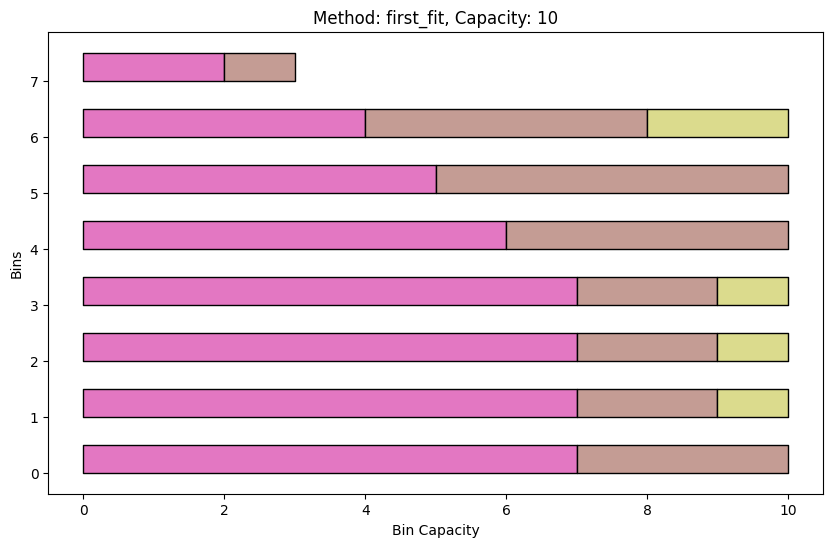

Elapsed time: 0.1611 seconds


In [23]:
test_solver2("first_fit", bin_capacity, item_list, visualize=True)